In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('G://Study Folder//DATASETS'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

G://Study Folder//DATASETS\games-release-ALL.csv


In [2]:
df = pd.read_csv('G://Study Folder//DATASETS//games-release-ALL.csv')

In [3]:
df

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,0,Pizza Tower,/app/2231450/,Jan 26 2023,"4,529","19,807",227,227,96.39%
1,1,Resident Evil 4,/app/2050650/,Mar 24 2023,"168,191","61,752","1,616","1,616",95.75%
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,Mar 31 2023,"15,543","12,643",213,213,95.54%
3,3,Pineapple on pizza,/app/2263010/,Mar 28 2023,"1,415","11,717",209,209,95.39%
4,4,Hi-Fi RUSH,/app/1817230/,Jan 25 2023,"6,132","14,152",324,324,95.09%
...,...,...,...,...,...,...,...,...,...
66422,66422,Space Empires V,/app/1690/,Oct 16 2006,137,290,120,120,67.34%
66423,66423,Iron Warriors: T-72 Tank Command,/app/1670/,Jul 26 2006,15,173,104,104,60.17%
66424,66424,Gumboy: Crazy Adventures,/app/2520/,Dec 19 2006,22,61,60,60,50.32%
66425,66425,Shattered Union,/app/3960/,Oct 25 2006,13,71,70,70,50.27%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66427 entries, 0 to 66426
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        66427 non-null  int64 
 1   game              66427 non-null  object
 2   link              66427 non-null  object
 3   release           66427 non-null  object
 4   peak_players      66427 non-null  object
 5   positive_reviews  66427 non-null  object
 6   negative_reviews  66427 non-null  object
 7   total_reviews     66427 non-null  object
 8   rating            66427 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [5]:
df.head()
df = df.replace(',','',regex = True)
features = ['peak_players','positive_reviews','negative_reviews']
df[features] = df[features].astype(int)

In [6]:
df = df.drop(['link','total_reviews'],axis = 1)

In [7]:
df_1_ = df.sort_values('positive_reviews', ascending = False).reset_index().head(100)
df_1_

,index,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,rating
0,65121,65121,Counter-Strike: Global Offensive,Aug 21 2012,1519457,6307931,809845,88.29%
1,64838,64838,Dota 2,Jul 9 2013,1295114,1618770,341275,82.17%
2,60737,60737,Grand Theft Auto V,Apr 13 2015,364548,1319655,219551,85.25%
3,54389,54389,PUBG: BATTLEGROUNDS,Dec 21 2017,3257248,1235880,927317,57.04%
4,65339,65339,Terraria,May 16 2011,489886,1088680,24768,97.05%
...,...,...,...,...,...,...,...,...
95,56246,56246,American Truck Simulator,Feb 2 2016,19153,121033,4212,95.28%
96,15227,15227,It Takes Two,Mar 26 2021,32685,117519,5429,94.25%
97,47927,47927,Z1 Battle Royale,Feb 28 2018,151239,115005,92076,55.40%
98,20946,20946,NARAKA: BLADEPOINT,Aug 12 2021,187468,114786,58633,65.76%


In [8]:
df_1_0 = df.sort_values('peak_players',ascending = False).reset_index().head(100)
df_1_0

,index,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,rating
0,54389,54389,PUBG: BATTLEGROUNDS,Dec 21 2017,3257248,1235880,927317,57.04%
1,65121,65121,Counter-Strike: Global Offensive,Aug 21 2012,1519457,6307931,809845,88.29%
2,7840,7840,Lost Ark,Feb 11 2022,1325305,137424,53849,71.29%
3,64838,64838,Dota 2,Jul 9 2013,1295114,1618770,341275,82.17%
4,27772,27772,Cyberpunk 2077,Dec 10 2020,1054388,472567,132706,77.56%
...,...,...,...,...,...,...,...,...
95,3358,3358,Raft,Jun 20 2022,101096,246467,16558,92.68%
96,26099,26099,Crusader Kings III,Sep 1 2020,98872,81599,6927,90.81%
97,21602,21602,MIR4,Aug 25 2021,97173,8469,4602,63.94%
98,26461,26461,The Sims™ 4,Jun 18 2020,96328,82106,12232,85.86%


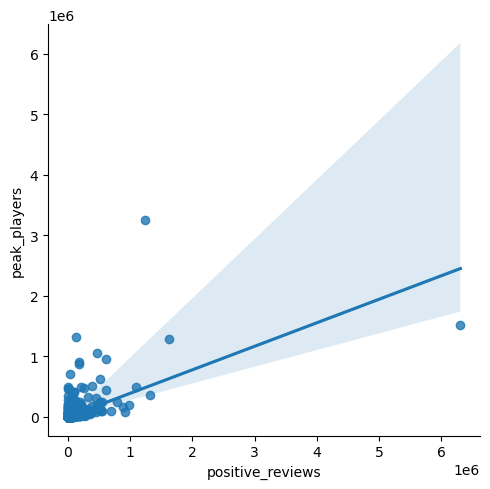

In [9]:
sns.lmplot(x = 'positive_reviews',y = 'peak_players',data = df)

In [10]:
df_t = df.sort_values('rating',ascending = False).reset_index().head(100)
df_t

,index,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,rating
0,35050,35050,People Playground,Jul 23 2019,15026,175076,2086,97.54%
1,3295,3295,Vampire Survivors,Oct 20 2022,77061,188186,2341,97.52%
2,25952,25952,Hades,Sep 17 2020,37749,219790,3274,97.34%
3,56243,56243,Stardew Valley,Feb 26 2016,94879,547823,9918,97.32%
4,66262,66262,Portal,Oct 10 2007,20672,126704,1934,97.09%
...,...,...,...,...,...,...,...,...
95,5,5,东北之夏,Jan 9 2023,8672,8891,165,95.08%
96,56249,56249,Don't Starve Together,Apr 21 2016,68418,369233,15241,95.08%
97,63136,63136,Grimm,Jan 6 2014,30886,30906,911,95.06%
98,15209,15209,文字遊戲：第零章,Jan 14 2021,412,4357,46,95.04%


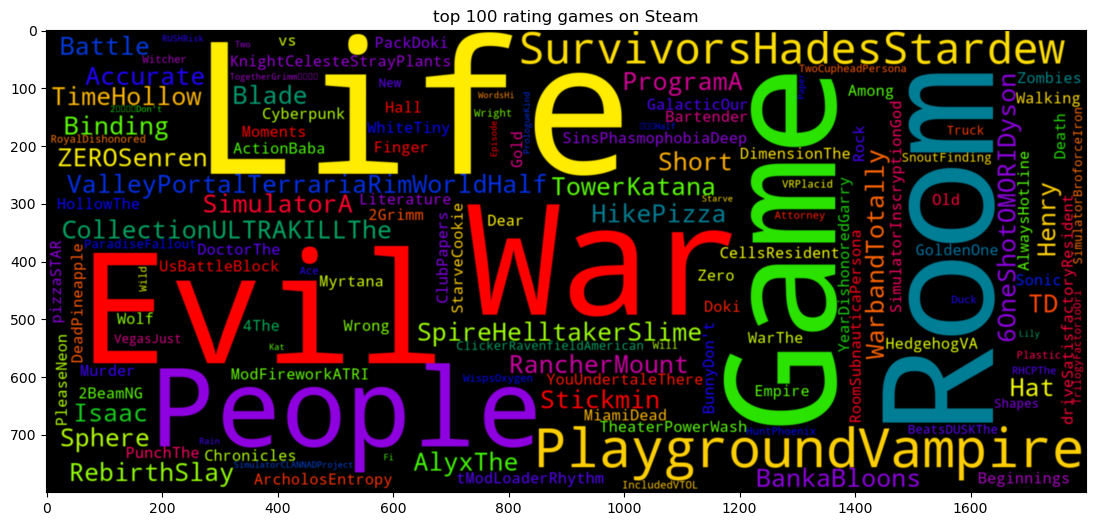

In [13]:
from wordcloud import WordCloud,STOPWORDS
text = ''.join(df_t['game'])
wc = WordCloud(width = 1800, height = 800,colormap = 'prism',background_color = 'black').generate(text)
plt.figure(figsize = (25,6))
plt.title('top 100 rating games on Steam')
plt.imshow(wc,interpolation = 'bicubic')
plt.show()

In [16]:
df['release'] = pd.to_datetime(df['release'],format = '%b %d %Y')
df['release'] = df['release'].dt.year

In [17]:
df

,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,rating
0,0,Pizza Tower,2023,4529,19807,227,96.39%
1,1,Resident Evil 4,2023,168191,61752,1616,95.75%
2,2,The Murder of Sonic the Hedgehog,2023,15543,12643,213,95.54%
3,3,Pineapple on pizza,2023,1415,11717,209,95.39%
4,4,Hi-Fi RUSH,2023,6132,14152,324,95.09%
...,...,...,...,...,...,...,...
66422,66422,Space Empires V,2006,137,290,120,67.34%
66423,66423,Iron Warriors: T-72 Tank Command,2006,15,173,104,60.17%
66424,66424,Gumboy: Crazy Adventures,2006,22,61,60,50.32%
66425,66425,Shattered Union,2006,13,71,70,50.27%


In [18]:
release = pd.pivot_table(df, index = 'release', values = 'game', aggfunc = len).reset_index()

release

,release,game
0,2006,62
1,2007,103
2,2008,180
3,2009,277
4,2010,222
5,2011,244
6,2012,246
7,2013,373
8,2014,1588
9,2015,2630


<AxesSubplot:xlabel='release', ylabel='game'>

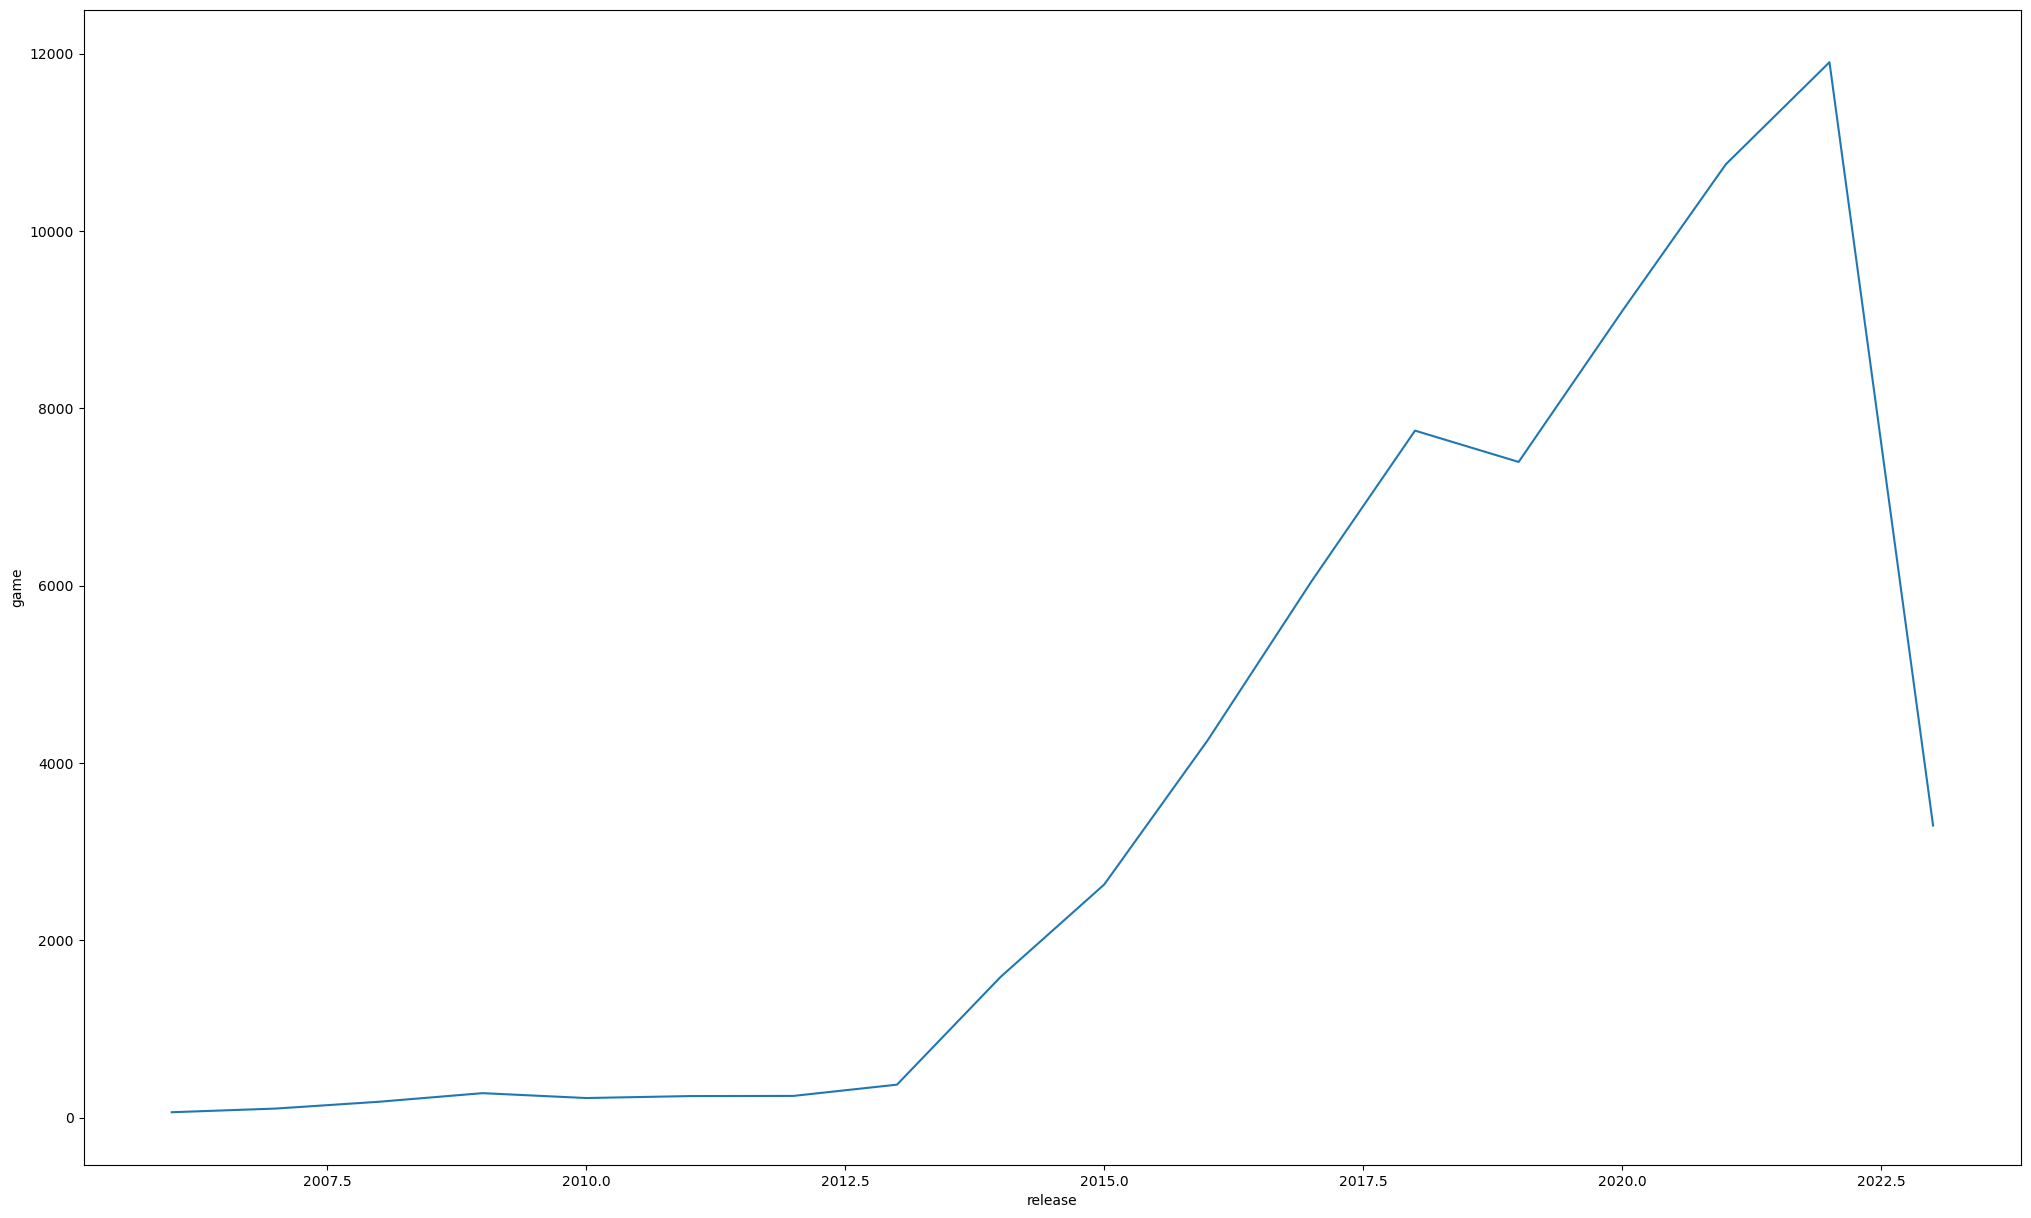

In [19]:
plt.figure(figsize = (25,15))
sns.lineplot(x = release['release'], y = release['game'])